In [1]:
%pylab inline

import sys
if r'D:\\!Data' not in sys.path:
    sys.path.append(r'D:\\!Data')

from scipy.optimize import curve_fit
import inspect
import os
import pickle

from thulium_python_lib.image_processing import *
from thulium_python_lib.parallel_processing import *

%px from IPython.parallel import bind_kernel; bind_kernel()

Populating the interactive namespace from numpy and matplotlib
importing sys on engine(s)
importing os on engine(s)


:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Setting directory to work with 

In [2]:
# Which folder to handle
folder = '14 generator t=30/'

working_directory = os.path.join(os.getcwd(),folder)
print('Current directory', os.getcwd())
print('Working directory', working_directory)

# Create folder 'Figures' for saving individual plot
if folder != '' and not os.path.exists('Figures'):
    os.makedirs('Figures')

Current directory D:\!Data\2015_06_17
Working directory D:\!Data\2015_06_17\14 generator t=30/


### Constructing data

In [3]:
# loading images, filter each image with 
#all_data = load_data(working_directory, do_filtering=True)
all_data = load_data_parallel(working_directory, do_filtering=False)

   6/6 tasks finished after    0 s
done

Total number of images:  60


In [4]:
# rearranging to dictionary
dataD = rearrange_data(all_data)

Rearranging to dictionary is complited


In [5]:
# sifting(filtering) data - removing empty images
sift(dataD)

In [6]:
# for plotting sifted? image
#imshow(imread('1 от частоты амплитудной модуляции аома верди (5) 3.9W/26ms/2_1.png'))
#colorbar()

In [7]:
# averaging data
#avr_dataD = average_data(dataD)
avr_dataD = average_data_parallel(dataD)

   6/6 tasks finished after    0 s
done



### After above, we can analize our data 

In [8]:
def exp_decay(t, N0, tau, background):
    return N0 * exp(- t / tau) + background
def exp_decay_no_bg(t, N0, tau):
    return N0 * exp(- t / tau)
def cloud_expansion(t, T, r0, t0):
    k_b = 1.38e-23
    m = 169 * 1.66e-27
    return sqrt( r0**2 + 2 * k_b * T * (t + t0)**2 / m)

# function to convert arbitrary units to atoms number
convert_N_atoms = N_atoms(width=0.5, delta = 5)

####Plotting atoms number for different tipes of data

Fit parameters [('N0', 160668997.12169313), ('tau', 31703.135875711654), ('background', -160572062.14496496)]


(0, 90000.0)

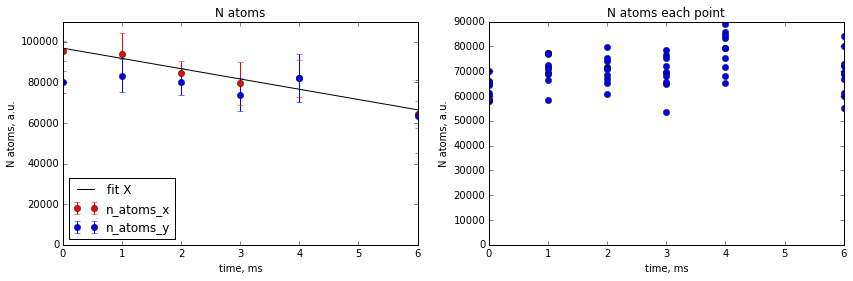

In [15]:
shot_typeN = 1

# constracting data arrays
x_data_x,n_atoms_x = constract_data(avr_dataD, shot_typeN, 'total')
n_atoms_x = convert_N_atoms(n_atoms_x)
x_data_x,n_atoms_x_err = constract_data(avr_dataD, shot_typeN, 'std_total')
n_atoms_x_err = convert_N_atoms(n_atoms_x_err)
#x_data_x,n_atoms_x = drop_data((x_data_x,n_atoms_x),[0])

x_data_y,n_atoms_y = constract_data(avr_dataD, shot_typeN, 'y_data_fit',0)
n_atoms_y = convert_N_atoms(n_atoms_y)
x_data_y,n_atoms_y_err = constract_data(avr_dataD, shot_typeN, 'std_y_data',0)
n_atoms_y_err = convert_N_atoms(n_atoms_y_err)
#x_data_y,n_atoms_y = drop_data((x_data_y,n_atoms_y),[00])

x_data_x_all,n_atoms_x_all = constract_data(dataD, shot_typeN, 'x_data_fit',0)
n_atoms_x_all = convert_N_atoms(n_atoms_x_all)

# fit_func - which function to use to fit data
fit_func = exp_decay

# fitting
popt_T, pcov_T = curve_fit(fit_func, x_data_x, n_atoms_x, p0=(n_atoms_x[0], 100,0))
print('Fit parameters',*list(zip(inspect.getargspec(fit_func)[0][1:], popt_T)))

# plotting
fig2, ax2 = subplots(1,2, figsize=(14,4))
ax2[0].errorbar(x_data_x, n_atoms_x, yerr=n_atoms_x_err, fmt='ro', label='n_atoms_x')
ax2[0].errorbar(x_data_y, n_atoms_y, yerr=n_atoms_y_err, fmt='bo', label='n_atoms_y')
x_dat = linspace(0,max(x_data_x),100)
ax2[0].plot(x_dat, fit_func(x_dat,*popt_T),'k', label='fit X')
ax2[0].set_xlabel('time, ms')
ax2[0].set_ylabel('N atoms, a.u.')
ax2[0].set_title('N atoms')
ax2[0].set_ylim(bottom=0)
ax2[0].legend(loc=3)
ax2[1].plot(x_data_x_all,n_atoms_x_all,'o')
ax2[1].set_xlabel('time, ms')
ax2[1].set_ylabel('N atoms, a.u.')
ax2[1].set_title('N atoms each point')
ax2[1].set_ylim(bottom=0)

####Save plots to folder 'Figures' (if in outter directory) and data to file 'all_N_atoms_data.txt' 

In [ ]:
if folder != '':
    fig2.savefig(os.path.join('Figures',folder.rstrip(r'\/ ')+'.png'))
    try:
        with open('all_N_atoms_data.txt', 'rb') as handle:
            res_dict = pickle.loads(handle.read())
    except FileNotFoundError:
        res_dict = {}
    except EOFError:
        res_dict = {}
    res_dict[folder.rstrip(r'\/ ')]=(0.1*x_data_x, n_atoms_x)
    with open('all_N_atoms_data.txt', 'wb') as handle:
        pickle.dump(res_dict, handle)
    print('Figure and data saved!!!')

####Normalize average data

In [ ]:
#norm_avr_dataD = normalise_avr_image(avr_dataD, 1, 2, 'x_data_fit',0)

####Normalize each image

In [ ]:
#norm_dataD = normalise_individual_image(dataD, 1, 2, 'x_data_fit',0)


####And do smth with this data

####Looking at second shot_typeN

In [ ]:
#x_data,y_data = constract_data(avr_dataD, 2, 'total')
#plot(append(x_data, 0), append(y_data,0), 'o')